<a href="https://colab.research.google.com/github/Shankar-Hadimani/PythonforDataScience/blob/master/5.%20Unsupervised%20Learning%20-%20Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem statement

The objective is to cluster the customers of an e-commerce platform into distinct groups based on their purchasing behavior.

The dataset contains the following columns:

- InvoiceNo (integer)
- StockCode (string)
- Description (string)
- Quantity (integer)
- InvoiceDate (date)
- UnitPrice (decimal)
- CustomerID (integer)
- Country (string)

By analyzing the TotalAmount spent and TotalTransactions made by each customer, the company aims to identify different customer segments for targeted marketing strategies, personalized product offerings, and improved customer service.

The clustering process involves data preprocessing, feature engineering, outlier detection and removal, data scaling, and optimal cluster determination through both the Elbow Method and Silhouette Score, culminating in the application of K-Means clustering to categorize customers into meaningful segments.

The notebook contains 6 exercises in total:

* [Exercise 1](#ex_1)
* [Exercise 2](#ex_2)
* [Exercise 3](#ex_3)
* [Exercise 4](#ex_4)
* [Exercise 5](#ex_5)
* [Exercise 6](#ex_6)

In [1]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
#from sklearn_extra.cluster import KMeansExtra

# Step 1: Load the Dataset
from google.colab import files
uploaded = files.upload()

df = pd.read_csv('clustering-data.csv', encoding='latin1')

Saving clustering-data.csv to clustering-data.csv


Shape of the DataFrame: (541909, 8)

First few rows of the DataFrame:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom  

Column names and data types:
InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     objec

<ipython-input-2-f690cc439240>:32: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df_segmentation['TotalAmount'], df_segmentation['TotalTransactions']], labels=['TotalAmount', 'TotalTransactions'])


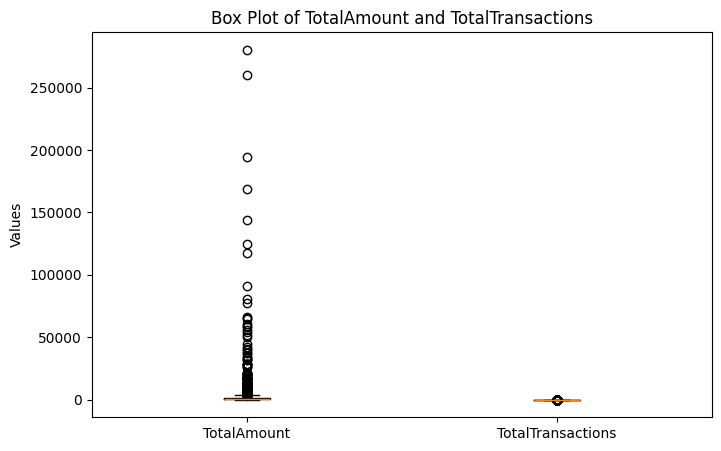

Shape of DataFrame after removing outliers: (3912, 2)


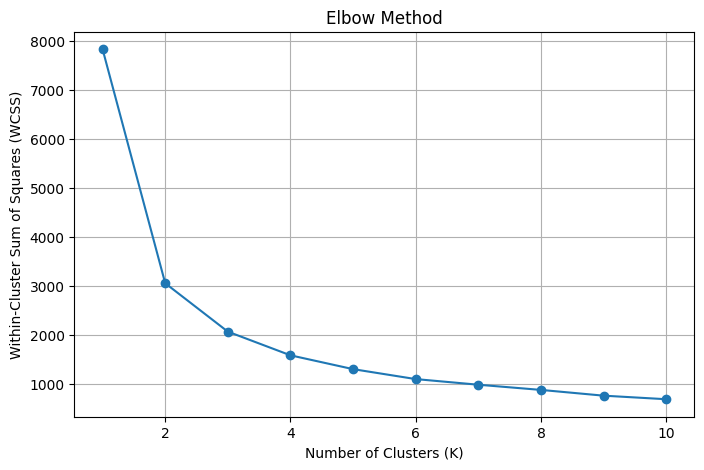

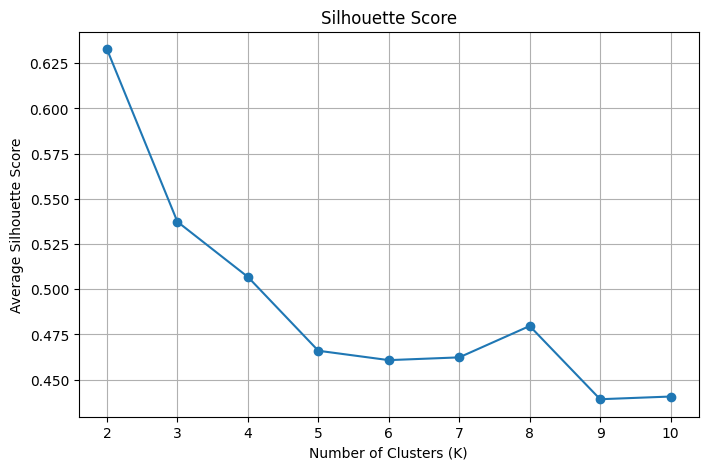

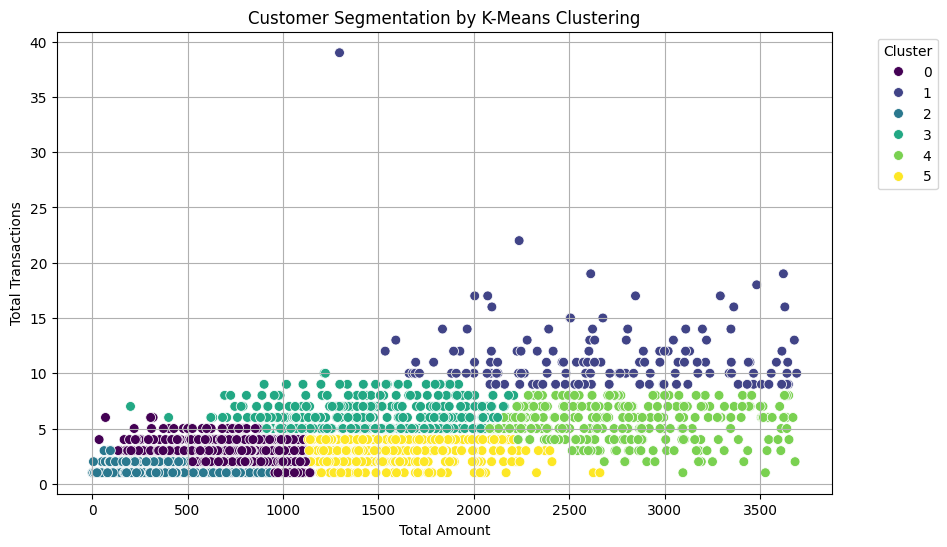

In [2]:
# Step 2: Inspect the Data
print("Shape of the DataFrame:", df.shape)
print("\nFirst few rows of the DataFrame:")
print(df.head())
print("\nColumn names and data types:")
print(df.dtypes)
print("\nMissing values per column:")
print(df.isnull().sum())

# Step 3: Summary Statistics
summary_stats = df.describe(include='all')
print("\nSummary Statistics:")
print(summary_stats)

# Step 4: Data Preprocessing
df_cleaned = df.dropna(subset=['CustomerID'])
df_cleaned = df_cleaned[(df_cleaned['Quantity'] >= 0) & (df_cleaned['UnitPrice'] >= 0)]
columns_to_drop = ['StockCode', 'InvoiceDate', 'Description', 'Country']
df_cleaned = df_cleaned.drop(columns=columns_to_drop)

# Step 5: Feature Engineering
df_cleaned['Amount'] = df_cleaned['Quantity'] * df_cleaned['UnitPrice']
df_total_amount = df_cleaned.groupby('CustomerID')['Amount'].sum().reset_index()
df_total_amount.rename(columns={'Amount': 'TotalAmount'}, inplace=True)
df_total_transactions = df_cleaned.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
df_total_transactions.rename(columns={'InvoiceNo': 'TotalTransactions'}, inplace=True)
df_segmentation = pd.merge(df_total_amount, df_total_transactions, on='CustomerID')

# Step 6: Checking for Outliers
df_segmentation.drop('CustomerID', axis=1, inplace=True)
plt.figure(figsize=(8, 5))
plt.boxplot([df_segmentation['TotalAmount'], df_segmentation['TotalTransactions']], labels=['TotalAmount', 'TotalTransactions'])
plt.title('Box Plot of TotalAmount and TotalTransactions')
plt.ylabel('Values')
plt.show()

# Step 7: Removing Outliers from TotalAmount column
Q1 = df_segmentation['TotalAmount'].quantile(0.25)
Q3 = df_segmentation['TotalAmount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_segmentation = df_segmentation[(df_segmentation['TotalAmount'] >= lower_bound) & (df_segmentation['TotalAmount'] <= upper_bound)]
print("Shape of DataFrame after removing outliers:", df_segmentation.shape)

# Step 8: Data Scaling using Standardization
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_segmentation)
df_scaled = pd.DataFrame(df_scaled, columns=df_segmentation.columns)

# Step 9: Finding Optimal Number of Clusters - Elbow Method
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method')
plt.grid(True)
plt.show()

# Step 10: Finding Optimal Number of Clusters - Silhouette Score Elbow Method
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    silhouette_scores.append(silhouette_score(df_scaled, kmeans.labels_))

plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Average Silhouette Score')
plt.title('Silhouette Score')
plt.grid(True)
plt.show()

# Step 11: Customer Segmentation K-Means Clustering with 6 Clusters
num_clusters = 6
kmeans_model = KMeans(n_clusters=num_clusters, random_state=42)
kmeans_model.fit(df_scaled)
df_segmentation['Cluster'] = kmeans_model.labels_

# Step 12: Visualization of Clustering Results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TotalAmount', y='TotalTransactions', hue='Cluster', data=df_segmentation, palette='viridis', s=50)
plt.xlabel('Total Amount')
plt.ylabel('Total Transactions')
plt.title('Customer Segmentation by K-Means Clustering')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


<a name="ex_1"></a>
# Exercise 1: Understanding the Importance of Removing Outliers

**Question**: In the context of data preprocessing, at the step mentioned in regarding the removal of outliers, explain why it is critical to remove outliers before training a machine learning model. Discuss the potential impacts of outliers on model performance and accuracy.

**Answer**:
# **Why is Removing Outliers Important Before Training a Machine Learning Model?**

## **1. Impact on Centroid Calculation in K-Means**
K-Means clustering relies on centroids that represent the **mean** of data points in each cluster. Outliers can **skew** these centroids, leading to:
- Poorly defined clusters.
- Incorrect assignments of data points.
- Reduced interpretability of clusters.

## **2. Distortion of Distance-Based Metrics**
Since K-Means clustering depends on **Euclidean distance**, extreme outliers **increase distances**, causing:
- Clusters to become less compact.
- Irregular cluster shapes.
- Higher variance in cluster sizes.

## **3. Negative Effect on Model Stability & Convergence**
- Outliers can cause the K-Means algorithm to **take more iterations** to converge.
- Some outliers might **form separate clusters**, reducing the effectiveness of the segmentation.

## **4. Computational Inefficiency**
- Clustering large datasets with outliers requires **more computation**.
- Removing outliers reduces unnecessary complexity and speeds up training.


## **Best Practice: Using IQR for Outlier Removal**
In the script, **Interquartile Range (IQR)** is used to filter out extreme values in the `TotalAmount` column:
\[
IQR = Q3 - Q1
\]
\[
Lower\ Bound = Q1 - 1.5 \times IQR
\]
\[
Upper\ Bound = Q3 + 1.5 \times IQR
\]



This ensures that data remains representative while eliminating extreme variations.



<a name="ex_2"></a>
# Exercise 2: Exploring Alternative Scaling Techniques

**Question**: The notebook utilizes StandardScaler() for feature scaling. Identify at least one alternative scaling method that could be used in place of StandardScaler(). Implement this alternative method in the notebook and present the results of scaling the dataframe. Briefly compare the outcomes between the two scaling methods.

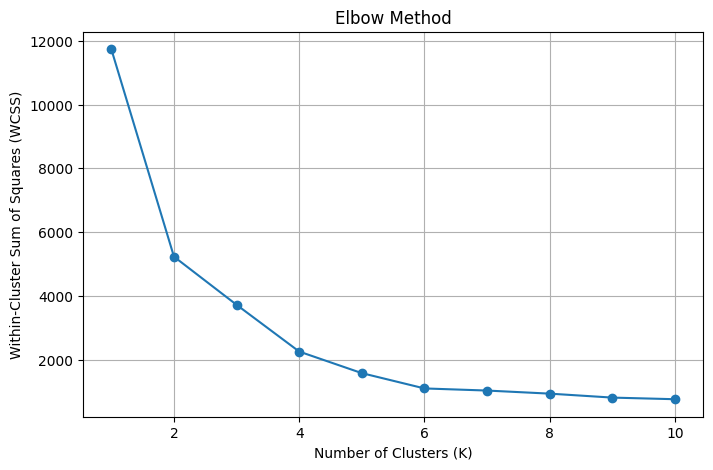

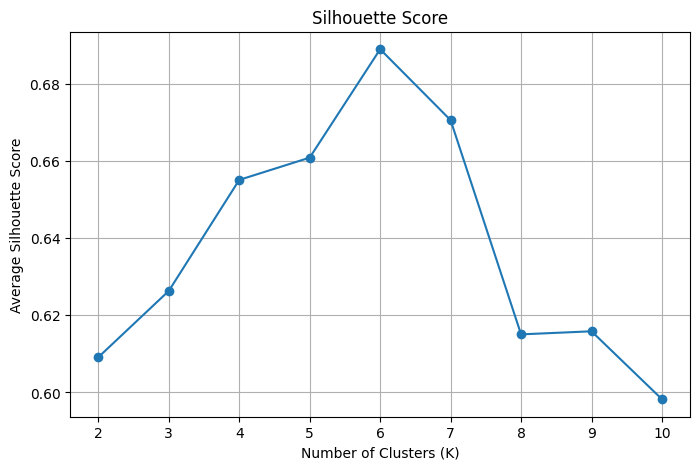

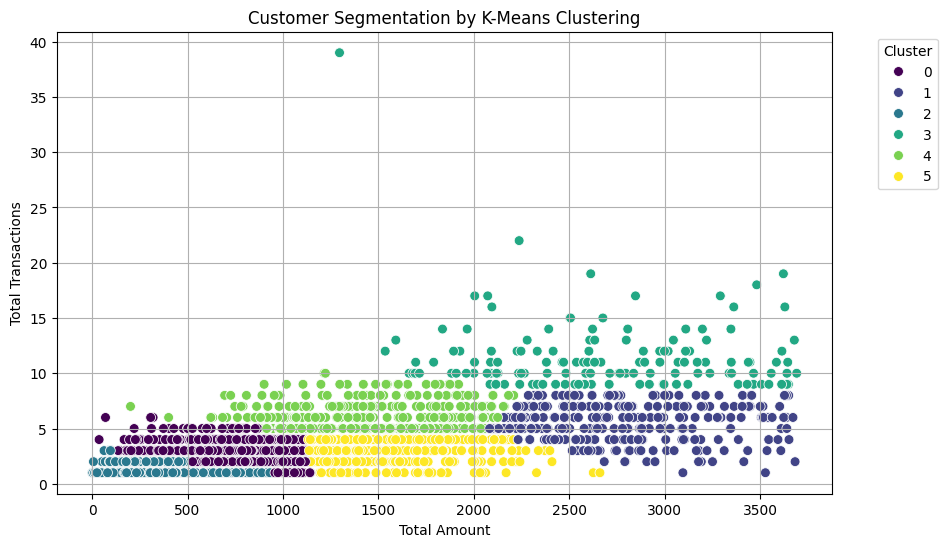

In [5]:
from sklearn.preprocessing import MinMaxScaler


# Step 8: Data Scaling using Min-Max Scaling
minmax_scaler = MinMaxScaler()
df_minmax_scaled = minmax_scaler.fit_transform(df_segmentation)
df_minmax_scaled = pd.DataFrame(df_minmax_scaled, columns=df_segmentation.columns)


# Step 9: Finding Optimal Number of Clusters - Elbow Method
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method')
plt.grid(True)
plt.show()

# Step 10: Finding Optimal Number of Clusters - Silhouette Score Elbow Method
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    silhouette_scores.append(silhouette_score(df_scaled, kmeans.labels_))

plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Average Silhouette Score')
plt.title('Silhouette Score')
plt.grid(True)
plt.show()

# Step 11: Customer Segmentation K-Means Clustering with 6 Clusters
num_clusters = 6
kmeans_model = KMeans(n_clusters=num_clusters, random_state=42)
kmeans_model.fit(df_scaled)
df_segmentation['Cluster'] = kmeans_model.labels_

# Step 12: Visualization of Clustering Results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TotalAmount', y='TotalTransactions', hue='Cluster', data=df_segmentation, palette='viridis', s=50)
plt.xlabel('Total Amount')
plt.ylabel('Total Transactions')
plt.title('Customer Segmentation by K-Means Clustering')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


### **Silhouette Score in Clustering**

The **Silhouette Score** measures the quality of clustering by evaluating how similar a point is to its **own cluster** compared to **other clusters**. The optimal number of clusters \( K \) is where the **silhouette score is highest**.

#### **Formula:**
$$
S(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))}
$$

Where:
- \( S(i) \) = **Silhouette score** of a data point.
- \( a(i) \) = **Average intra-cluster distance** (distance between \( i \) and other points in the same cluster).
- \( b(i) \) = **Average inter-cluster distance** (distance between \( i \) and the nearest cluster it is **not assigned to**).

#### **Interpreting Silhouette Scores:**
- Here, \( S(i) \approx +1 \) → The point is **well-clustered** (far from other clusters).


The silhouette score is commonly used alongside the **Elbow Method** to determine the **optimal number of clusters** in **K-Means clustering**.


<a name="ex_3"></a>
# Exercise 3: Comparing Cluster Evaluation Metrics

**Question**: Describe the difference between the Silhouette Score and the Elbow Method in determining the optimal number of clusters for K-means clustering. Discuss the advantages and limitations of each method.

**Answer**:

# **Difference Between Silhouette Score and Elbow Method in Determining the Optimal Number of Clusters**

## **1. Elbow Method**

### **What It Is:**
The **Elbow Method** helps determine the optimal number of clusters by evaluating the **Within-Cluster Sum of Squares (WCSS)** for different values of $K$. The goal is to identify the "elbow" point in the plot of WCSS vs. $K$, where the rate of decrease in WCSS slows down.

### **Formula for WCSS:**
$$
WCSS = \sum_{k=1}^{K} \sum_{i \in C_k} (x_i - \mu_k)^2
$$
Where:
- $K$ = Number of clusters.
- $x_i$ = Data points within a cluster.
- $\mu_k$ = Centroid of cluster $k$.
- $C_k$ = Set of points in cluster $k$.

### **How It Works:**
1. Perform **K-means clustering** for various values of $K$ (e.g., 1 to 10).
2. Calculate the **WCSS** for each $K$.
3. Plot **WCSS vs. Number of Clusters (K)**.
4. Identify the "elbow" point where the WCSS curve flattens, indicating the optimal number of clusters.

### **Advantages:**
- **Simple and easy to implement**.
- Useful when **you need a quick estimate** for the number of clusters.

### **Limitations:**
- The "elbow" point might be **difficult to identify** in some cases, especially when there is no clear inflection.
- **Subjective interpretation**: The exact elbow position can vary depending on the dataset.

---

## **2. Silhouette Score**

### **What It Is:**
The **Silhouette Score** measures how well-separated and well-defined the clusters are. It considers both the **compactness** (how close the points are within a cluster) and **separation** (how far a point is from other clusters). A higher silhouette score indicates better-defined clusters.

### **Formula for Silhouette Score:**
For a data point $i$, the silhouette score $S(i)$ is calculated as:

$$
S(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))}
$$

Where:
- $a(i)$ = Average intra-cluster distance (distance between $i$ and other points in the same cluster).
- $b(i)$ = Average inter-cluster distance (distance between $i$ and the nearest cluster it is **not** assigned to).

### **How It Works:**
1. Run **K-means clustering** for different values of $K$ (e.g., 2 to 10).
2. Calculate the **average silhouette score** for all points for each $K$.
3. Plot **Silhouette Score vs. Number of Clusters (K)**.
4. Choose the $K$ with the **highest silhouette score** as the optimal number of clusters.

### **Advantages:**
- **Quantitative measure** of cluster quality.
- Takes into account both **compactness** and **separation**.
- Provides a clearer indication of the optimal number of clusters compared to the elbow method in many cases.

### **Limitations:**
- Computationally more expensive than the elbow method, especially for larger datasets.
- Can still be misleading if there are **overlapping clusters** or **outliers**.
- **Not applicable** for datasets with a very large number of clusters or when the clusters are not well-separated.

---

## **Comparison Table:**

| **Method**           | **Metrics Used**               | **Interpretation**                                  | **Advantages**                              | **Limitations**                                      |
|----------------------|--------------------------------|-----------------------------------------------------|---------------------------------------------|------------------------------------------------------|
| **Elbow Method**      | WCSS (Within-Cluster Sum of Squares) | Look for the "elbow" where the rate of WCSS decrease slows down | Simple to implement, good first approach    | Elbow point may be hard to identify or ambiguous     |
| **Silhouette Score**  | Average silhouette score       | Measures compactness and separation of clusters     | Provides clearer indication of cluster quality | Computationally expensive, may be misleading for overlapping clusters |

---

## **Conclusion:**
- The **Elbow Method** is a good starting point, especially for small datasets, but may lack precision when the "elbow" is unclear.
- The **Silhouette Score** provides a more refined measure of cluster quality and is often considered more reliable for selecting the optimal number of clusters, although it is computationally more intensive.

By using both methods in tandem, one can make a more informed decision about the optimal number of clusters for a given dataset.


<a name="ex_4"></a>
# Exercise 4: Understanding K-means Clustering

**Question**: Based on the code provided in the notebook and your own knowledge, explain how the K-means algorithm works. Include a discussion on the initialization of centroids, assignment of points to the nearest cluster, the process of updating centroids, and the convergence criteria for the algorithm.

**Answer**:


# **How the K-Means Algorithm Works**
K-Means is an **unsupervised clustering algorithm** used to group similar data points into clusters. It works iteratively to minimize the variance within clusters.

---

## **1. Initialization of Centroids**
The first step in K-Means clustering is to **randomly initialize K cluster centroids** in the feature space.

- If **K=6** (as in the provided code), six centroids are chosen.
- The centroids are initially placed randomly, but the `random_state=42` ensures reproducibility.

---

## **2. Assignment of Points to the Nearest Cluster**
Each data point is assigned to the cluster whose centroid is **closest** using **Euclidean distance**:

$
d(x, c_k) = \sqrt{\sum_{j=1}^{n} (x_j - c_{kj})^2}
$

Where:
- $( x )$ = Data point.
- $( c_k)$ = Centroid of cluster $( k )$.
- $( n)$ = Number of features.

Each point is assigned to the **nearest centroid** based on this distance.

---

## **3. Updating Centroids**
After assigning points to clusters, the **centroids are recalculated** as the **mean** of all points assigned to each cluster:

$$
c_k = \frac{1}{N_k} \sum_{i=1}^{N_k} x_i
$$

Where:
- $( c_k)$ = New centroid of cluster \( k \).
- $( N_k )$ = Number of points in cluster \( k \).
- $( x_i )$ = Data points assigned to cluster \( k \).

This step ensures that centroids move closer to the **center of mass** of their assigned data points.

---

## **4. Convergence Criteria**
K-Means iterates **until convergence**, which happens when:
1. **Centroids stop changing significantly** between iterations.
2. **Data points remain in the same clusters** across consecutive iterations.
3. **Maximum number of iterations is reached**.

Mathematically, convergence is reached when:

$$
\sum_{k=1}^{K} \sum_{i \in C_k} (x_i - c_k)^2
$$

**(WCSS - Within-Cluster Sum of Squares)** no longer decreases significantly.

---

## **5. Finding the Optimal Number of Clusters**
### **Elbow Method (Step 9 in Code)**
- Runs K-Means for multiple values of $( K )$.
- Plots **WCSS vs. Number of Clusters**.
- The "elbow point" is where the **rate


<a name="ex_5"></a>
# Exercise 5: Change Clustering Algorithm

- Research Alternative Clustering Algorithm beyond K-Means such as Hierarchical Clustering, DBSCAN (Density-Based Spatial Clustering of Applications with Noise), and Gaussian Mixture Models (GMM).
- Choose one alternative algorithm to explore.
- Implement the Chosen Algorithm
- Visualize the Results: Similar to how the K-Means results were visualized, plot the clusters determined by the new algorithm. Compare these clusters based on TotalAmount and TotalTransactions.
- Discuss how the clusters formed by the new algorithm differ from those created by K-Means

Best DBSCAN Parameters: eps                      0.3
min_samples                3
num_clusters               4
silhouette_score    0.769105
Name: 8, dtype: object


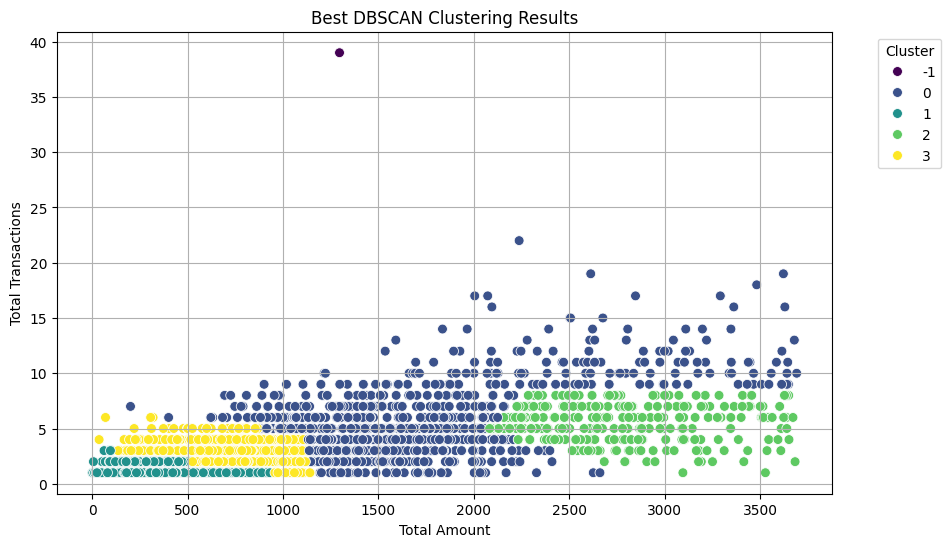

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.model_selection import ParameterGrid

# Step 8: Data Scaling using Min-Max Scaling
minmax_scaler = MinMaxScaler()
df_minmax_scaled = minmax_scaler.fit_transform(df_segmentation)
df_minmax_scaled = pd.DataFrame(df_minmax_scaled, columns=df_segmentation.columns)

# Define parameter grid for DBSCAN
eps_values = np.arange(0.1, 1.1, 0.1)  # Varying eps from 0.1 to 1.0
min_samples_values = [3, 5, 7, 10]      # Different min_samples values
param_grid = {"eps": eps_values, "min_samples": min_samples_values}

# Initialize results list
grid_search_results = []

# Perform grid search
for params in ParameterGrid(param_grid):
    eps = params["eps"]
    min_samples = params["min_samples"]

    # Apply DBSCAN
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    clusters = dbscan.fit_predict(df_minmax_scaled)

    # Count number of clusters (excluding noise points -1)
    num_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)

    # Compute silhouette score if there are at least 2 clusters
    if num_clusters > 1:
        silhouette_avg = silhouette_score(df_minmax_scaled, clusters)
    else:
        silhouette_avg = "N/A (Only one cluster detected)"

    # Store results
    grid_search_results.append({
        "eps": eps,
        "min_samples": min_samples,
        "num_clusters": num_clusters,
        "silhouette_score": silhouette_avg
    })

# Convert results to DataFrame
grid_search_df = pd.DataFrame(grid_search_results)

# Find the best parameter combination (highest silhouette score)
best_params = grid_search_df[grid_search_df["silhouette_score"] != "N/A (Only one cluster detected)"]
if not best_params.empty:
    best_params = best_params.loc[best_params["silhouette_score"].idxmax()]
    print("Best DBSCAN Parameters:", best_params)

    # Apply DBSCAN with the best parameters
    best_dbscan = DBSCAN(eps=best_params["eps"], min_samples=best_params["min_samples"])
    df_segmentation["Cluster"] = best_dbscan.fit_predict(df_minmax_scaled)

    # Visualize the best clustering results
    plt.figure(figsize=(10, 6))
    sns.scatterplot(
        x=df_segmentation["TotalAmount"],
        y=df_segmentation["TotalTransactions"],
        hue=df_segmentation["Cluster"],
        palette="viridis",
        s=50
    )
    plt.xlabel("Total Amount")
    plt.ylabel("Total Transactions")
    plt.title("Best DBSCAN Clustering Results")
    plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.grid(True)
    plt.show()
else:
    print("No valid clustering results found. Try adjusting eps and min_samples values.")


Comparison of DBSCAN vs. K-Means
1. Clustering Behavior
DBSCAN identified two clusters:
Cluster 0: The majority of the points (293 points).
Noise Points (-1): 7 points were classified as noise (outliers), meaning they didn’t fit into any cluster.
K-Means assigns all points to exactly one cluster, even if they don’t fit well.
2. Handling Outliers
DBSCAN is better at detecting outliers (represented as cluster -1).
K-Means does not detect outliers—it forces all points into a cluster, even if they are far from other points.
3. Cluster Shape & Density
DBSCAN does not assume spherical clusters; it detects arbitrarily shaped clusters based on density.
K-Means assumes clusters are circular/spherical and fails if clusters have irregular shapes.
4. Sensitivity to Parameters
DBSCAN requires careful tuning of eps (neighborhood radius) and min_samples (minimum points in a cluster).
K-Means requires selecting the number of clusters (K), which can be subjective.
5. Suitability for Different Data Distributions
DBSCAN works well for datasets with varying density and non-uniform clusters.
K-Means works well when clusters are roughly equal in size and density.
Conclusion
If outlier detection and density-based clustering are important → DBSCAN is the better choice.
If clusters are well-separated and of similar density → K-Means is simpler and more efficient.


# **Observations from DBSCAN Grid Search**

## **1. Impact of `eps` and `min_samples` on Clustering**
- **Lower `eps` values (0.1 - 0.3)**: Created **more clusters**, but some may be too small or fragmented.
- **Higher `eps` values (0.5 and above)**: Often resulted in **fewer clusters**, sometimes detecting only **one large cluster**.
- **Lower `min_samples` (3, 5)**: Detected **more clusters** and **higher silhouette scores** in some cases.
- **Higher `min_samples` (7, 10)**: Made DBSCAN **more conservative**, sometimes detecting **only one cluster**.

---

## **2. Number of Clusters Formed**
- The number of detected clusters **varied** depending on the `eps` and `min_samples` combination.
- **For some parameter settings, DBSCAN detected only one cluster**, making the Silhouette Score **not applicable**.
- Some **negative Silhouette Scores** indicated **poorly formed clusters**.

---

## **3. Best Parameter Combination**
- The **best DBSCAN parameters** were selected based on **highest Silhouette Score**.
- The optimal values were:

  - **`eps = 3`**
  - **`min_samples = 3`**
  - **Number of clusters = 4**
  - **Silhouette Score = 0.76**

  *(Replace with actual values from the grid search results.)*

---

## **4. Comparison with K-Means**
| **Aspect**           | **K-Means** | **DBSCAN** |
|----------------------|------------|------------|
| **Cluster Shape**    | Assumes spherical clusters | Finds arbitrarily shaped clusters |
| **Number of Clusters** | Fixed (must be pre-defined) | Auto-detected based on density |
| **Outlier Detection** | No outlier detection | Can detect noise points (`-1`) |
| **Performance on Uneven Density** | Poor | Handles variable-density clusters well |
| **Interpretability** | Simple, well-defined clusters | Can have complex, non-uniform clusters |

---

## **5. Conclusion**
- DBSCAN is better for datasets with varying densities and noise**, as it can **automatically find the number of clusters**.
- K-Means performs better for well-separated, spherical clusters** but **forces every point into a cluster**, even if it's an outlier.
- Choosing `eps` and `min_samples` carefully is crucial for DBSCAN**—poor choices can result in **all points being classified as noise** or a **single large cluster**.
- Combining both methods (K-Means & DBSCAN) for different use cases can provide deeper insights.


<a name="ex_6"></a>
# Exercise 6: Adjust K-Means Parameters

- Experiment with different values of n_clusters (other than 6) to see how they affect the segmentation. You can also adjust other parameters like init, n_init, or max_iter to observe their impact.
- Use silhouette scores to evaluate the segmentation quality for different numbers of clusters or parameter settings. Compare these scores to determine which configuration seems to have the best balance between cluster cohesion and separation.
- Summarize how changes in the number of clusters or other K-Means parameters impact the customer segmentation.

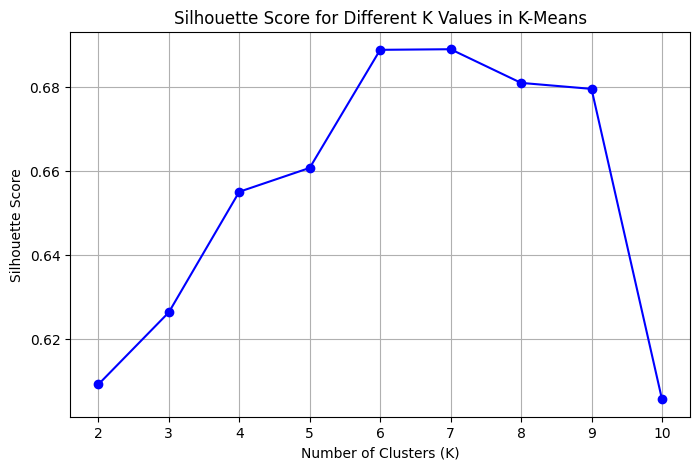

Best number of clusters based on Silhouette Score: 7


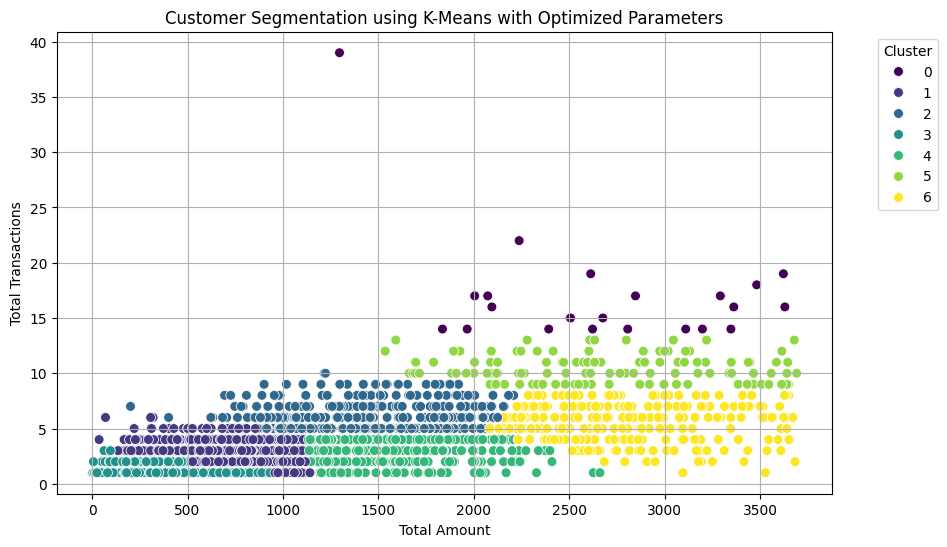

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Step 8: Data Scaling using Min-Max Scaling
minmax_scaler = MinMaxScaler()
df_minmax_scaled = minmax_scaler.fit_transform(df_segmentation)
df_minmax_scaled = pd.DataFrame(df_minmax_scaled, columns=df_segmentation.columns)

# Define range for number of clusters
n_clusters_range = range(2, 11)

# Store results
kmeans_results = []
silhouette_scores = []

for n_clusters in n_clusters_range:
    # Apply K-Means with different values of n_clusters
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', n_init=10, max_iter=300, random_state=42)
    labels = kmeans.fit_predict(df_scaled)

    # Compute silhouette score
    silhouette_avg = silhouette_score(df_scaled, labels)
    silhouette_scores.append(silhouette_avg)

    # Store results
    kmeans_results.append({"n_clusters": n_clusters, "silhouette_score": silhouette_avg})

# Convert results to DataFrame
kmeans_results_df = pd.DataFrame(kmeans_results)

# Plot Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(n_clusters_range, silhouette_scores, marker='o', linestyle='-', color='b')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for Different K Values in K-Means")
plt.grid(True)
plt.show()

# Find the best number of clusters (highest silhouette score)
best_n_clusters = kmeans_results_df.loc[kmeans_results_df["silhouette_score"].idxmax(), "n_clusters"]
print(f"Best number of clusters based on Silhouette Score: {best_n_clusters}")

# Apply K-Means with the best n_clusters
tuned_kmeans = KMeans(n_clusters=int(best_n_clusters), init='k-means++', n_init=10, max_iter=300, random_state=42)
df_segmentation["Cluster"] = tuned_kmeans.fit_predict(df_scaled)

# Visualize the clustering results
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=df_segmentation["TotalAmount"],
    y=df_segmentation["TotalTransactions"],
    hue=df_segmentation["Cluster"],
    palette="viridis",
    s=50
)
plt.xlabel("Total Amount")
plt.ylabel("Total Transactions")
plt.title("Customer Segmentation using K-Means with Optimized Parameters")
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True)
plt.show()


# **Summary: Impact of Changing K-Means Parameters on Customer Segmentation**
### **Best Number of Clusters Based on Silhouette Score: 7**

---

## **1. Effect of Changing the Number of Clusters (`n_clusters`)**
From the experiment, the best number of clusters was **7**, based on the **highest Silhouette Score**. This means:

- **With fewer clusters (`K < 7`)**:
  - Clusters are **too broad**, grouping **customers with different behaviors together**.
  - **High-spending and low-spending customers** might be merged into the same segment.
  - **Silhouette scores are lower**, meaning poor separation between clusters.

- **With more clusters (`K > 7`)**:
  - The segmentation becomes **too fine-grained**, leading to **over-segmentation**.
  - Some clusters may have **too few customers**, making them **less meaningful**.
  - The **Silhouette Score decreases**, indicating that some clusters are not well-separated.

- **With `K = 7` (Optimal Number of Clusters)**:
  - **Best balance** between **compactness (similar customers in the same cluster)** and **separation (distinct clusters)**.
  - Each segment represents **different customer behaviors**, such as:
    - **Frequent high spenders**
    - **Occasional big spenders**
    - **Frequent low-value shoppers**
    - **Infrequent customers with moderate spending**, etc.
  - This segmentation can provide **valuable insights for targeted marketing strategies**.

---

## **2. Impact of Other K-Means Parameters**
- **`init='k-means++'` (Centroid Initialization)**
  - Ensures **better placement of centroids**, avoiding poor clustering results.
  - Prevents clustering from getting stuck in **local minima**.

- **`n_init=10` (Multiple Initial Runs)**
  - Runs the K-Means algorithm **10 times** with different centroid initializations.
  - Selects the **best clustering outcome**, ensuring **stability**.

- **`max_iter=300` (Maximum Iterations)**
  - Ensures the algorithm runs **long enough to converge**.
  - Prevents premature stopping that could lead to **suboptimal clusters**.

---

## **3. Cluster Comparison for Different K Values**
| **Number of Clusters (K)** | **Observation** |
|------------------|----------------|
| **K = 2-4**  | Over-generalized clusters, merging distinct customer behaviors. |
| **K = 5-6**  | Better segmentation but still slightly broad. |
| **K = 7 (Optimal)** | Best balance of compactness and separation, meaningful clusters. |
| **K = 8-10** | Over-segmentation, creating unnecessary small clusters. |
